In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF,LatentDirichletAllocation
%matplotlib inline

In [7]:
with open('../data/clean_tweets.pkl', 'rb') as infile:
    df = pickle.load(infile)

In [8]:
df.shape

(809416, 19)

In [4]:
df.head()

,_id,coordinates,coordinates_type,country,created_at,default_profile_image,hash_tags,lang,text,tweet_location,user_created,user_followers,user_following,user_likes,user_location,user_num_tweets,user_screen_name,sentiment,sentiment_type
0,5a5abc8f4dd9627aad3c1326,None,None,United States,Sun Jan 07 18:21:57 +0000 2018,False,[],en,Because they’ll clap at a opp or someone who d...,"Los Angeles, CA",Fri Aug 06 17:54:32 +0000 2010,1410,219,2253,Outer Space ↔️City of Angels,36230,ForeverKofi,-0.8720,neg
1,5a5abc8f4dd9627aad3c1327,"[26.6167555, -80.0684479]",Point,United States,Sun Jan 07 18:21:57 +0000 2018,False,"[{'text': 'job', 'indices': [34, 38]}]",en,Can you recommend anyone for this ? Daily Subs...,"Lake Worth, FL",Sat Aug 21 04:43:48 +0000 2010,392,225,0,Florida,161,tmj_FL_EDU,0.3612,neu
2,5a5abc8f4dd9627aad3c1328,None,None,United States,Sun Jan 07 18:21:57 +0000 2018,False,[],en,Memes to cope and I’m off work tomorrow,"Waco, TX",Mon Oct 27 02:05:39 +0000 2008,565,359,10048,"Waco, Texas",28053,dirtybohemia,0.0000,neu
3,5a5abc8f4dd9627aad3c1329,None,None,United States,Sun Jan 07 18:21:57 +0000 2018,False,[],en,I cannot wait for August,"Muncie, IN",Sat Jun 23 21:37:47 +0000 2012,533,850,9986,trapped inside my head,5539,ejanepuckett,0.0000,neu
4,5a5abc8f4dd9627aad3c132a,None,None,United States,Sun Jan 07 18:21:57 +0000 2018,False,[],en,is water wet?!,"Sheffield Lake, OH",Mon Nov 04 20:39:21 +0000 2013,201,237,9986,None,1467,emdavis1522,0.0000,neu


In [9]:
gb = df.groupby('sentiment_type')

In [10]:
num_of_pos = gb.get_group('pos').shape[0]

In [11]:
num_of_neu = gb.get_group('neu').shape[0]

In [12]:
num_of_neg = gb.get_group('neg').shape[0]

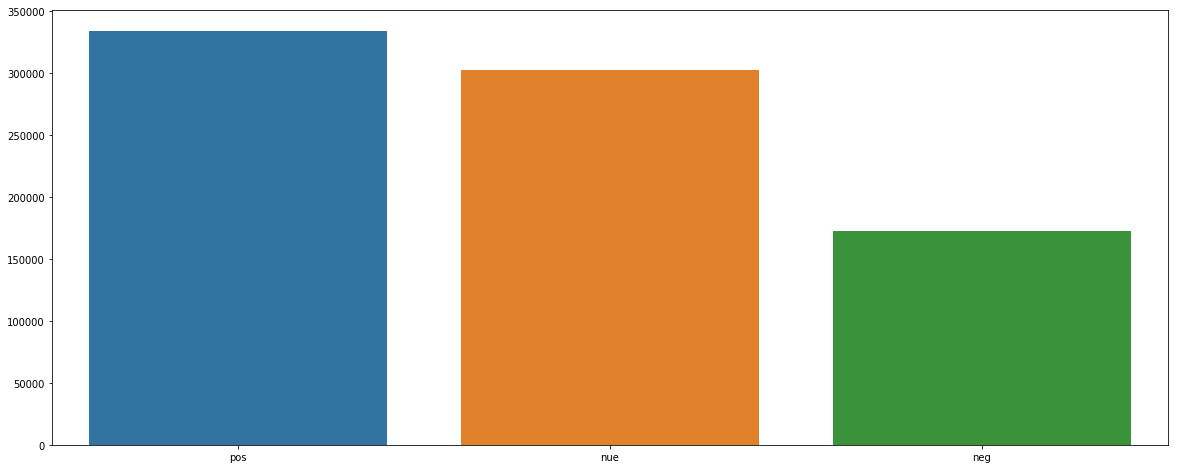

In [13]:
fig = plt.figure(figsize=(20, 8))
sns.barplot(['pos', 'nue', 'neg'], [num_of_pos, num_of_neu, num_of_neg])

In [30]:
# fig = plt.figure(figsize=(14, 6))
# ax1 = fig.add_subplot(311)
# ax1.set_title('Positive')
# ax2 = fig.add_subplot(312)
# ax2.set_title('Neutral')
# ax3 = fig.add_subplot(313)
# ax3.set_title('Negative')

# sns.violinplot(gb.get_group('pos').sentiment, ax=ax1)
# sns.violinplot(gb.get_group('neu').sentiment, ax=ax2)
# sns.violinplot(gb.get_group('neg').sentiment, ax=ax3)
# plt.xlabel('Sentiment')
# plt.ylabel('')

Text(0.5,1,'Positive')

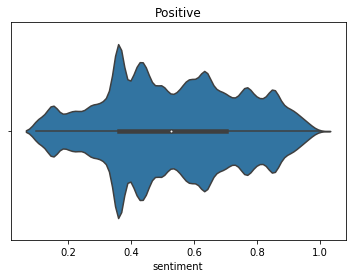

In [14]:
sns.violinplot(gb.get_group('pos').sentiment)
plt.title('Positive')

Text(0.5,1,'Neutral')

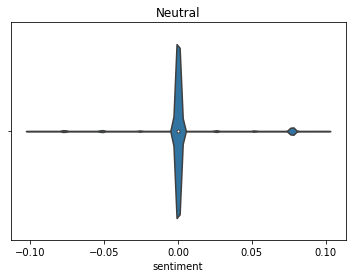

In [15]:
sns.violinplot(gb.get_group('neu').sentiment)
plt.title('Neutral')

Text(0.5,1,'Negative')

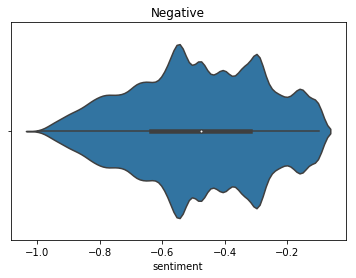

In [16]:
sns.violinplot(gb.get_group('neg').sentiment)
plt.title('Negative')

In [20]:
# df[df.sentiment == 0].shape[0]
num_of_neu

302507

In [27]:
df[df.sentiment_type == 'pos'].sort_values('sentiment', ascending=False)[['text', 'sentiment']][10:25]

,text,sentiment
244670,NEED SUPPORTIVE FRIENDS 2018NEED SUPPORTIVE FR...,0.9959
480236,wow I am a Georgia Fan but your love of our H...,0.9956
485647,Good morning beautiful friends wishing you all...,0.9930
799280,THANK YOU KIND SIR 👮🏽‍♀️ BLESSINGS ABUNDANTLY ...,0.9918
440210,"Happy Birthday to my beautiful, courageous, st...",0.9916
449078,Praise God thank you Jesus for another wonder...,0.9914
647957,Happy birthday to one of my favorite ladies ou...,0.9910
12035,stay positivestay positive stay positive stay ...,0.9910
171975,I Love u Guys so much. U mean the world to...,0.9904
143408,You’re seriously fucking gorgeous and amazing...,0.9899


In [29]:
df[df.sentiment_type == 'neg'].sort_values('sentiment')[['text', 'sentiment']][20:30]

,text,sentiment
437647,"I really try to be a nice guy, but in the pa...",-0.9854
715652,"THE WHITEHOUSE'S HOME SITE ""WELCOME TO THE W...",-0.9852
453094,White ppl are determined to oppressed so bad ...,-0.9849
767910,full offense but this is actually HORRIFYING??...,-0.9847
788726,I disagree. He had underlying mental issues...,-0.9843
763559,i work myself all the way up over doctors appo...,-0.9843
66163,Seriously she says she wants to fuck one membe...,-0.9838
759813,Not did OBUMMER do a bad job He tried to kill ...,-0.9833
317240,Black people are not slaves. If you disagree w...,-0.9829
76048,I'm not one for violence but this is war and t...,-0.9828


In [32]:
df.iloc[763559].text

'i work myself all the way up over doctors appointments involving test results/planning for treatment. hate hate hate hate hate hate hate hate'

In [1]:
%run nmf.py


Topics in NMF model:
Topic 1:
interested great texas north maybe folk flight florida focus yummy finish follow follower food football
Topic 2:
love fall know people miss tell watch girl song dude thing fucking baby guy rain
Topic 3:
happy birthday hope bday tuesday miss girl year sunday enjoy today make homie friend wait
Topic 4:
good friend luck thing morning hope look feel world know life year night time news
Topic 5:
thank follow share appreciate miss hope support girl glad make today goodness night bless sweet
Topic 6:
great manager time store technician associate game assistant hope service today team idea shift driver
Topic 7:
pron friend help hope life support need family appreciate tweet time start people trust welcome
Topic 8:
lmao nigga true need friend try know blow wild swear hear tell people wanna night
Topic 9:
want late work opening click team join beauty read view apply ulta advisor care seasonal
Topic 10:
just game make know play time look think amazing beautiful year